In [1]:
# Importing pandas to use dataframes
import pandas as pd
# Reading the contents of "BDOShoham.csv" into a dataframe df
df = pd.read_csv("BDOShoham.csv")
# Dropping all missing values inplace which directly modifies the dataframe
# (not necessary for this dataset)
df.dropna(inplace=True)
# Displaying the dataframe contents
df

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.30000,0.0250,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.00000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.30000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.00000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.30000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
...,...,...,...,...,...,...,...,...,...,...
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


In [2]:
# Description of the basic dataset statistics
df.describe()

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,2.168595e-19,3.388430e-21,0.0,6.661925e-16,1.387901e-17,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


In [3]:
# Creating data subsets for the prediction values and the classifiers
Predictors = df[["Vsl","Vsg","Ang"]]
Classifier = df["FlowPattern"]

In [4]:
Predictors

,Vsl,Vsg,Ang
0,6.30000,0.0250,0.0
1,4.00000,0.0400,0.0
2,6.30000,0.0400,0.0
3,4.00000,0.0630,0.0
4,6.30000,0.0630,0.0
...,...,...,...
5670,2.70096,15.8561,-80.0
5671,1.58784,15.8394,-80.0
5672,1.05338,16.0692,-80.0
5673,1.05397,25.7439,-80.0


In [5]:
Classifier

0       1
1       1
2       1
3       1
4       1
       ..
5670    5
5671    5
5672    5
5673    5
5674    5
Name: FlowPattern, Length: 5675, dtype: int64

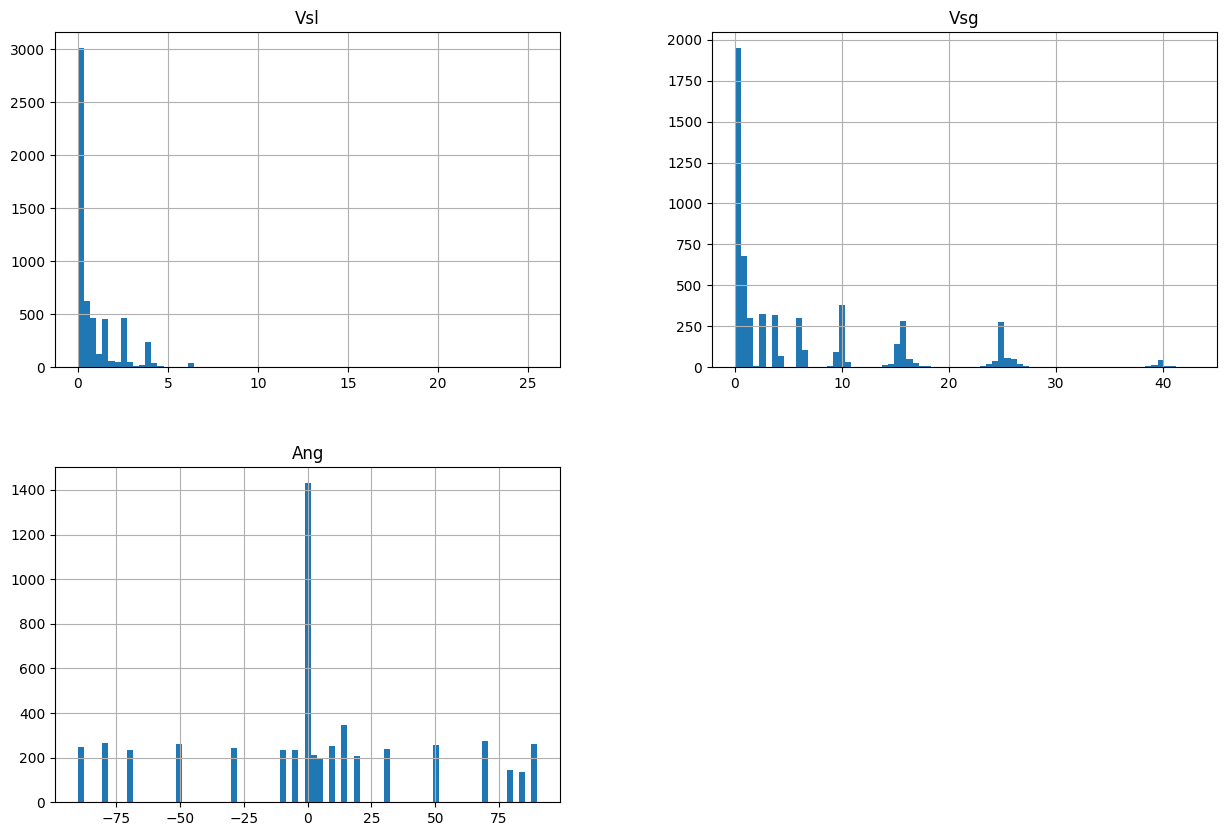

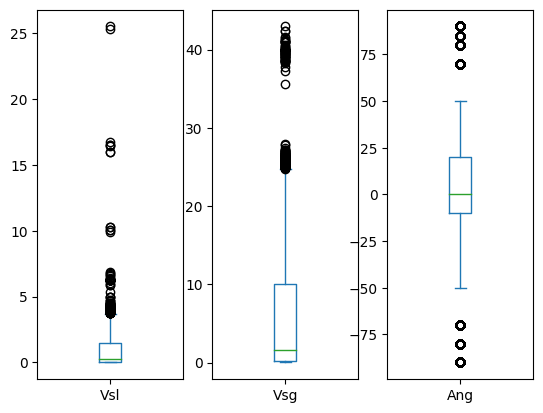

In [6]:
# Importing pyplot for plotting functionalilty
import matplotlib.pyplot as pl

%matplotlib inline
# Plotting histograms for each of the three predictors
Predictors.hist(figsize=(15, 10), bins=75)
pl.show()

# Plotting box and wisker graph for each of the three predictors
Predictors.plot(kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

Correlation Matrix:


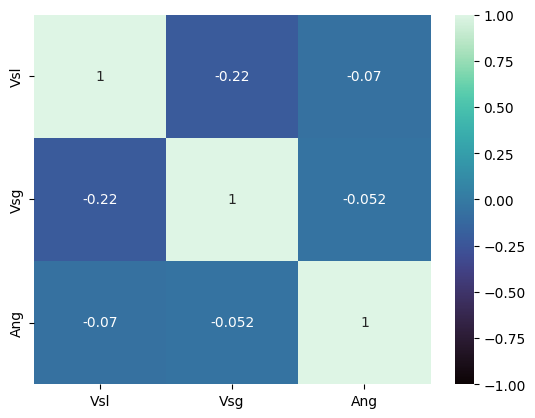

Scatter Plots:


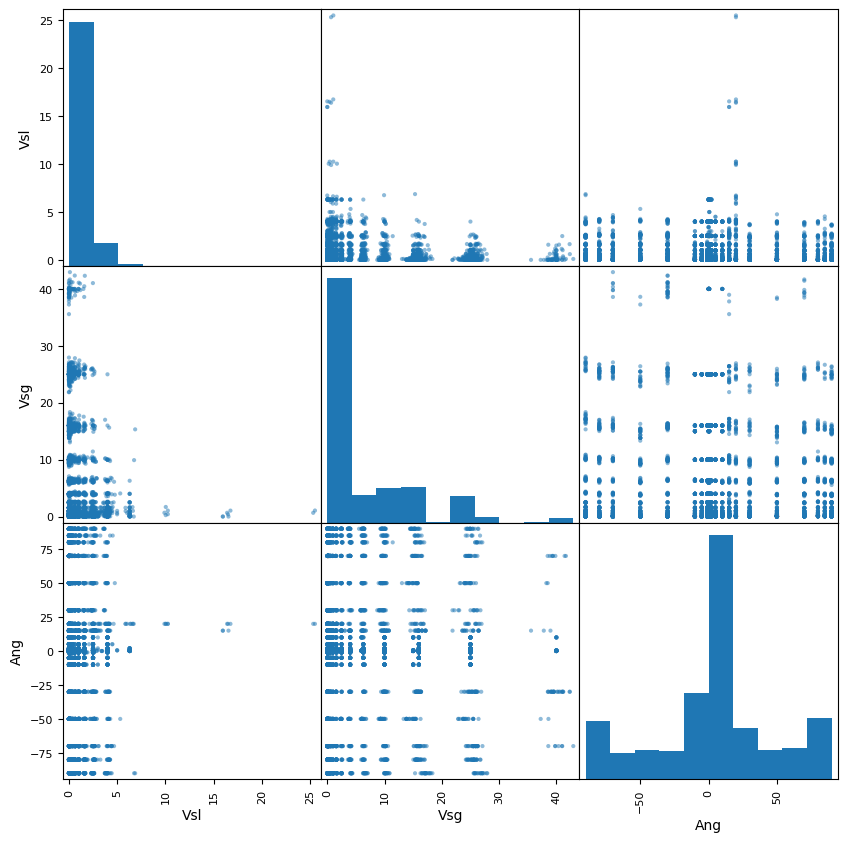

In [13]:
import seaborn as sns
from pandas.plotting import scatter_matrix

print("Correlation Matrix:")
corr = Predictors.corr()
sns.heatmap(corr, cmap="mako", annot=True, vmax=1.0, vmin=-1 );
pl.show()

print("Scatter Plots:")
scatter_matrix(Predictors, figsize=(10, 10))
pl.show()

In [8]:
# Importing ML libraries
from sklearn import model_selection
import numpy as np

# Setting random seed for repeatability
seed = 2

Pred_train, Pred_test, Class_train, Class_test = model_selection.train_test_split(Predictors, Classifier, test_size=0.20, random_state=seed)

In [9]:
# Importing various predication models
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Creating tuples with the model name and model data
PassAg = ("Passive Agressive",PassiveAggressiveClassifier(C=1.0, max_iter=1000))
LogReg = ("Logistic Regression",LogisticRegression(solver='liblinear', max_iter=1000))
Rdg = ("Ridge",RidgeClassifier(alpha = 10, max_iter=1000))
KNN = ("K Nearest Neighbors",KNeighborsClassifier(n_neighbors=3, weights="uniform", leaf_size=30, p=2))

# Making a list with all the models
models = [PassAg, LogReg, Rdg, KNN]

# List of the scoring methods I want results for
scoring = ["accuracy","recall_macro","f1_weighted","f1_macro"]

# Number of data folds for testing
k4folds = 5

for scoring_test in scoring:
    print(f"{scoring_test} results\n")
    for modelName, model in models:   # Select each model in turn

        kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)

        cv_results = model_selection.cross_val_score(model, Pred_train, Class_train, cv=kfold, scoring=scoring_test)

        
        print(f"{modelName}: Mean = {cv_results.mean():.6f} Std = {cv_results.std():.6f}\n")
    print("\n")

accuracy results

Passive Agressive: Mean = 0.513436 Std = 0.034906

Logistic Regression: Mean = 0.666740 Std = 0.009987

Ridge: Mean = 0.614978 Std = 0.014621

K Nearest Neighbors: Mean = 0.840088 Std = 0.012680



recall_macro results

Passive Agressive: Mean = 0.261001 Std = 0.059521

Logistic Regression: Mean = 0.376094 Std = 0.010454

Ridge: Mean = 0.309172 Std = 0.011935

K Nearest Neighbors: Mean = 0.814780 Std = 0.019533



f1_weighted results

Passive Agressive: Mean = 0.432018 Std = 0.075252

Logistic Regression: Mean = 0.613833 Std = 0.012199

Ridge: Mean = 0.534584 Std = 0.017742

K Nearest Neighbors: Mean = 0.841240 Std = 0.013081



f1_macro results

Passive Agressive: Mean = 0.289222 Std = 0.060462

Logistic Regression: Mean = 0.381270 Std = 0.009911

Ridge: Mean = 0.298859 Std = 0.014368

K Nearest Neighbors: Mean = 0.793246 Std = 0.008059





In [10]:
# Alternative method of testing multiple models and getting multiple scores using cross_validate()
for modelName, model in models:

    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)

    cv_results = model_selection.cross_validate(model, Pred_train, Class_train, cv=kfold, scoring=scoring, return_train_score=True)

    print(f"{modelName}:\n")
    print(f"{scoring[0]} results: Mean = {cv_results['test_accuracy'].mean():.6f} Std = {cv_results['test_accuracy'].std():.6f}")
    print(f"{scoring[1]} results: Mean = {cv_results['test_recall_macro'].mean():.6f} Std = {cv_results['test_recall_macro'].std():.6f}")
    print(f"{scoring[2]} results: Mean = {cv_results['test_f1_weighted'].mean():.6f} Std = {cv_results['test_f1_weighted'].std():.6f}")
    print(f"{scoring[3]} results: Mean = {cv_results['test_f1_macro'].mean():.6f} Std = {cv_results['test_f1_macro'].std():.6f}\n")

Passive Agressive:

accuracy results: Mean = 0.522247 Std = 0.065324
recall_macro results: Mean = 0.367699 Std = 0.073727
f1_weighted results: Mean = 0.477111 Std = 0.067792
f1_macro results: Mean = 0.302997 Std = 0.063552

Logistic Regression:

accuracy results: Mean = 0.666740 Std = 0.009987
recall_macro results: Mean = 0.376094 Std = 0.010454
f1_weighted results: Mean = 0.613833 Std = 0.012199
f1_macro results: Mean = 0.381270 Std = 0.009911

Ridge:

accuracy results: Mean = 0.614978 Std = 0.014621
recall_macro results: Mean = 0.309172 Std = 0.011935
f1_weighted results: Mean = 0.534584 Std = 0.017742
f1_macro results: Mean = 0.298859 Std = 0.014368

K Nearest Neighbors:

accuracy results: Mean = 0.840088 Std = 0.012680
recall_macro results: Mean = 0.814780 Std = 0.019533
f1_weighted results: Mean = 0.841240 Std = 0.013081
f1_macro results: Mean = 0.793246 Std = 0.008059



In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[i for i in range(1, 8, 1)], 'weights':['uniform','distance'], "p":[i for i in range(1, 5, 1)],"leaf_size":[i for i in range(1, 15, 3)]}
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring="accuracy")
clf.fit(Pred_train, Class_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Best score found on development set:")
print(clf.best_score_)
print("Index of best parameters set:")
print(clf.best_index_)

Best parameters set found on development set:
{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best score found on development set:
0.8561674008810574
Index of best parameters set:
0


Results for best KNN model:
Accuracy: 0.8581497797356828
Cohen Kappa Score: 0.7891541937240676
Matthews Correction Coefficient: 0.7898494627632198

 Clasification Report:
               precision    recall  f1-score   support

           1       0.74      0.83      0.78       123
           2       0.77      0.86      0.81        28
           3       0.89      0.82      0.85       174
           4       0.80      0.86      0.83       185
           5       0.92      0.88      0.90       594
           7       0.67      0.77      0.72        31

    accuracy                           0.86      1135
   macro avg       0.80      0.84      0.82      1135
weighted avg       0.86      0.86      0.86      1135



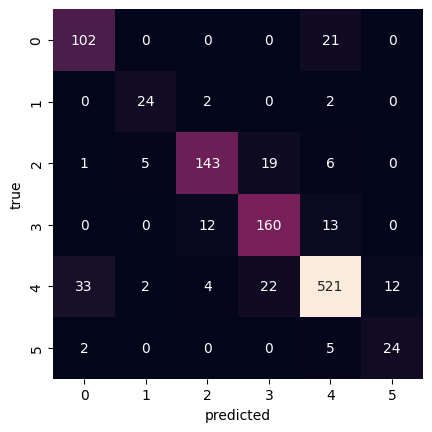

In [12]:
# Importing various scoring methods
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef


# Using the best parameters from GridSearchCV to check a few scoring tests
KNN = KNeighborsClassifier(n_neighbors=1, weights="uniform", leaf_size=1, p=1)
KNN.fit(Pred_train, Class_train)
KNN_Class_predicted = KNN.predict(Pred_test)

print('Results for best KNN model:')  
print('Accuracy:', accuracy_score(Class_test, KNN_Class_predicted))
print('Cohen Kappa Score:', cohen_kappa_score(Class_test, KNN_Class_predicted))
print('Matthews Correction Coefficient:',matthews_corrcoef(Class_test, KNN_Class_predicted))
print('\n Clasification Report:\n', classification_report(Class_test, KNN_Class_predicted))
sns.heatmap(confusion_matrix(Class_test,KNN_Class_predicted), square=True, annot=True, fmt='d', cbar=False)
pl.xlabel('predicted')
pl.ylabel('true');
pl.show()

## Discussion

First, multiple models were used to classify the FlowPattern using Vsl, Vsg, and Ang. Using the kfold method to better utilize the provided data, and various scoring methods for comparison, it was easy to see that the k Nearest Neighbors method was the best at classifying the data.

The next step was to use GridSearchCV to test multiple hyperparameter sets for the best result. It was determined that using n_neighbors=1, weights="uniform", leaf_size=1, p=1 resulted in the most accurate prediction model.

Finally, additional scoring methods were checked using these parameters. Notably, the confusion matrix and classification report revealed how good the model was at classifying FlowPattern 5.